In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree



# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys


sys.path.append(os.path.abspath("../../../src"))   
import soporte_regresion as f
pd.options.display.float_format = "{:,.2f}".format 
pd.set_option("display.max_columns", None)

In [2]:
df_encoded=pd.read_csv("..\..\..\datos\datos1\datos_clusterizados1_encoded_sinout.csv", index_col=0)

In [3]:
df_encoded.head()

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard
0,307.95,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.33,1.67,-0.00,1.20
1,497.45,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-1.26,1.67,0.54,2.45
2,554.52,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.03,1.67,0.54,1.75
3,419.99,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.04,1.67,6.36,1.90
4,464.86,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.72,0.71,1.05,2.37


Separamos en x e y

In [4]:
x= df_encoded.drop(columns="Sales_unitario")
y= df_encoded[["Sales_unitario"]]

Separamos en train y test y le hacemos aprender

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=42)
modelo_lineal= LinearRegression()
modelo_lineal.fit(x_train, y_train) 

LinearRegression()

Ahora hacemos la predicción

In [6]:
y_test_pred=modelo_lineal.predict(x_test)         #con esto predice un precio
y_train_pred= modelo_lineal.predict(x_train)

***K-Fold***

In [7]:
f.metricas(y_train, y_train_pred, y_test, y_test_pred)

,train,test
r2_score,0.37,0.33
MAE,40.66,42.45
MSE,"4,559.84","5,334.83"
RMSE,67.53,73.04


In [8]:
kf= KFold(n_splits=5,
          shuffle=True,
          random_state=42)

score_r2= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "r2")
np.mean(score_r2)

0.34818782777604473

In [9]:
score_mae= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_mean_absolute_error")
abs(np.mean(score_mae))

41.696165141912225

In [10]:
score_mse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_mean_squared_error")
abs(np.mean(score_mse))

4876.979365596365

In [11]:
score_rmse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_root_mean_squared_error")
abs(np.mean(score_rmse))

69.70521693638509

In [12]:
kf= KFold(n_splits=200,
          shuffle=True,
          random_state=42)

score_r2= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "r2")
np.mean(score_r2)

0.20013379754672317

In [13]:
score_rmse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_root_mean_squared_error")
abs(np.mean(score_rmse))

64.7072919973311

**Como seleccionar que variables independientes eliminar si sucede over fitting**

In [14]:

df_coefs=pd.DataFrame(modelo_lineal.coef_, columns= x.columns).T
df_coefs.sort_values(by=0, key= abs, ascending=False)    #para que ordene según la importancia

,0
Segment_Corporate,"-6,378,969,434,362,000.00"
Segment_Consumer,"-6,378,969,434,361,998.00"
Segment_Home Office,"-6,378,969,434,361,997.00"
Order Priority_Critical,"1,664,667,898,962,586.25"
Order Priority_Low,"1,664,667,898,962,584.25"
Order Priority_High,"1,664,667,898,962,580.00"
Order Priority_Medium,"1,664,667,898,962,578.75"
Ship Mode_First Class,"1,074,456,752,922,061.25"
Ship Mode_Second Class,"1,074,456,752,922,055.12"
Ship Mode_Standard Class,"1,074,456,752,922,054.62"


### Como ya me di cuenta de que no parece ser una relación lineal paso a decision tree

**DECISION TREE**  
Separa los datos en nodos y luego hace la media en el nodo final de la variable dependiente para los datos que se encuentran en ese nodo y cuando tenga que predecir, si el dato acaba en ese nodo, se le aplicará esa media como valor de su variable dependiente.  
   
***Para elegir el mejor árbol de decisión (conformado de unas variables independientes concretas)***   
Calcula la suma de los errores al cuadrado dividido entre n del nodo final de cada arbol y compara ese error y se queda con el que tenga el error mínimo
  
- Si hay mucha profundidad, los nodos finales van a ser tan específicos que se va a dar over fitting
  
***Como decirle que pare de dividir para evitar el Over Fitting***  
- max_depth (profundida máxima del árbol)
- min_sample_split (numero de datos minimo en el nodo (madre) para que se pueda dividir)  
- min_sample_leaf (numero de datos minimo que tienen que tener los nodos(hijos) en los que me divido) 
- max_leaf_nodes (numero maximo de nodos que quiero que tenga mi arbol)  
- max_features (numero máximo de variables independientes que queremos)

Pruebo primero a ver cómo me lo hace 

In [15]:
modelo_arbol_vacio= DecisionTreeRegressor()         
modelo_arbol_vacio.fit(x_train, y_train)
y_pred_test_arb_vacio= modelo_arbol_vacio.predict(x_test)
y_pred_train_arb_vacio= modelo_arbol_vacio.predict(x_train)
df_metricas_arbol_vacio= f.metricas(y_train, y_pred_train_arb_vacio, y_test, y_pred_test_arb_vacio)
df_metricas_arbol_vacio

,train,test
r2_score,0.99,0.26
MAE,1.65,42.12
MSE,87.96,"5,892.35"
RMSE,9.38,76.76


Dejándole a él sólo me da que se produce overfitting

In [16]:
# Parámetros a evaluar
params_arbol = {
    'max_depth': [3, 5, 7,200],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 200]
}

grid_search_arbol=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbol, cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 200],
                         'max_leaf_nodes': [4, 6, 8, 10, 20, 200],
                         'min_samples_leaf': [10, 50, 100, 200],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [17]:
modelo_final_arbol=grid_search_arbol.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbol

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=200, min_samples_leaf=10,
                      min_samples_split=10)

In [18]:
y_pred_test_arb= modelo_final_arbol.predict(x_test)
y_pred_train_arb= modelo_final_arbol.predict(x_train)
df_metricas_arbol= f.metricas(y_train, y_pred_train_arb, y_test, y_pred_test_arb)
df_metricas_arbol=df_metricas_arbol.T
df_metricas_arbol.reset_index(inplace=True)
df_metricas_arbol



,index,r2_score,MAE,MSE,RMSE
0,train,0.59,32.02,"2,998.29",54.76
1,test,0.55,33.58,"3,625.34",60.21


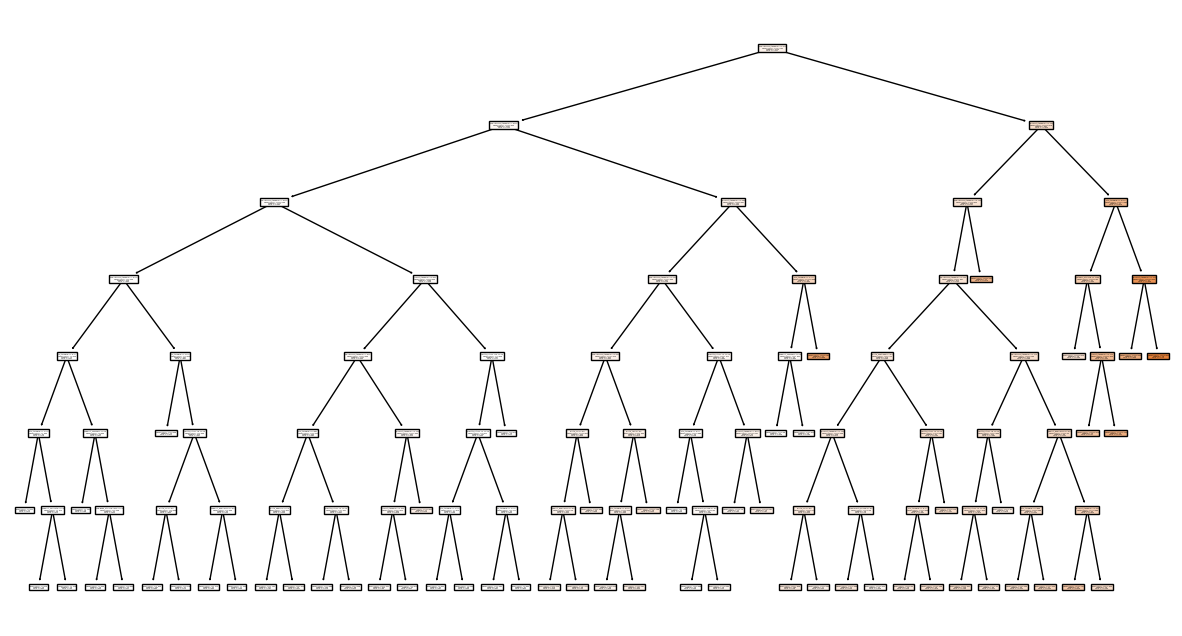

In [19]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=modelo_final_arbol, feature_names=x.columns, filled=True);

### **Este es el modelo inicial sobre el que cambiar los parametros para mejorar las métricas y por ende el modelo**

### Vamos a graficarlo porque así se entienden mejor

In [20]:
df_resultados_arbol=pd.DataFrame(grid_search_arbol.cv_results_)

In [21]:
df_resultados_arbol.sort_values(by= "rank_test_score", ascending=True).head(2)    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
272,0.02,0.00,0.01,0.00,7,200,10,10,"{'max_depth': 7, 'max_leaf_nodes': 200, 'min_s...","-2,889.60","-3,368.27","-4,592.17","-3,090.47","-3,399.10","-3,467.92",592.54,1
160,0.02,0.00,0.01,0.00,5,20,10,10,"{'max_depth': 5, 'max_leaf_nodes': 20, 'min_sa...","-2,779.49","-3,281.06","-4,956.32","-3,052.23","-3,335.04","-3,480.83",763.39,2


In [22]:
df_resultados_arbol.shape   #no da el número de modelos que ha generado el árbol 

(384, 17)

In [23]:
df_resultados_arbol_filtrado=df_resultados_arbol.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado["MSE"]= df_resultados_arbol["mean_test_score"]
df_resultados_arbol_filtrado.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,3,4,10,10,"-4,547.29"
1,3,4,10,50,"-4,547.29"
2,3,4,10,100,"-4,474.84"
3,3,4,10,200,"-4,474.84"
4,3,4,50,10,"-4,601.53"


In [24]:
df_rmse_profun= np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun.head()

,param_max_depth,MSE
0,3,68.11
1,5,67.71
2,7,67.76
3,200,67.81


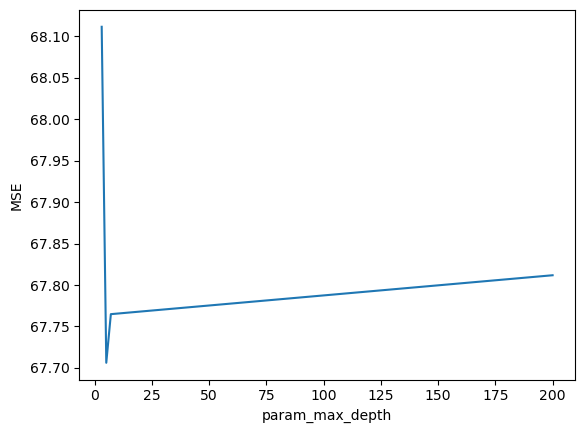

In [25]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun);

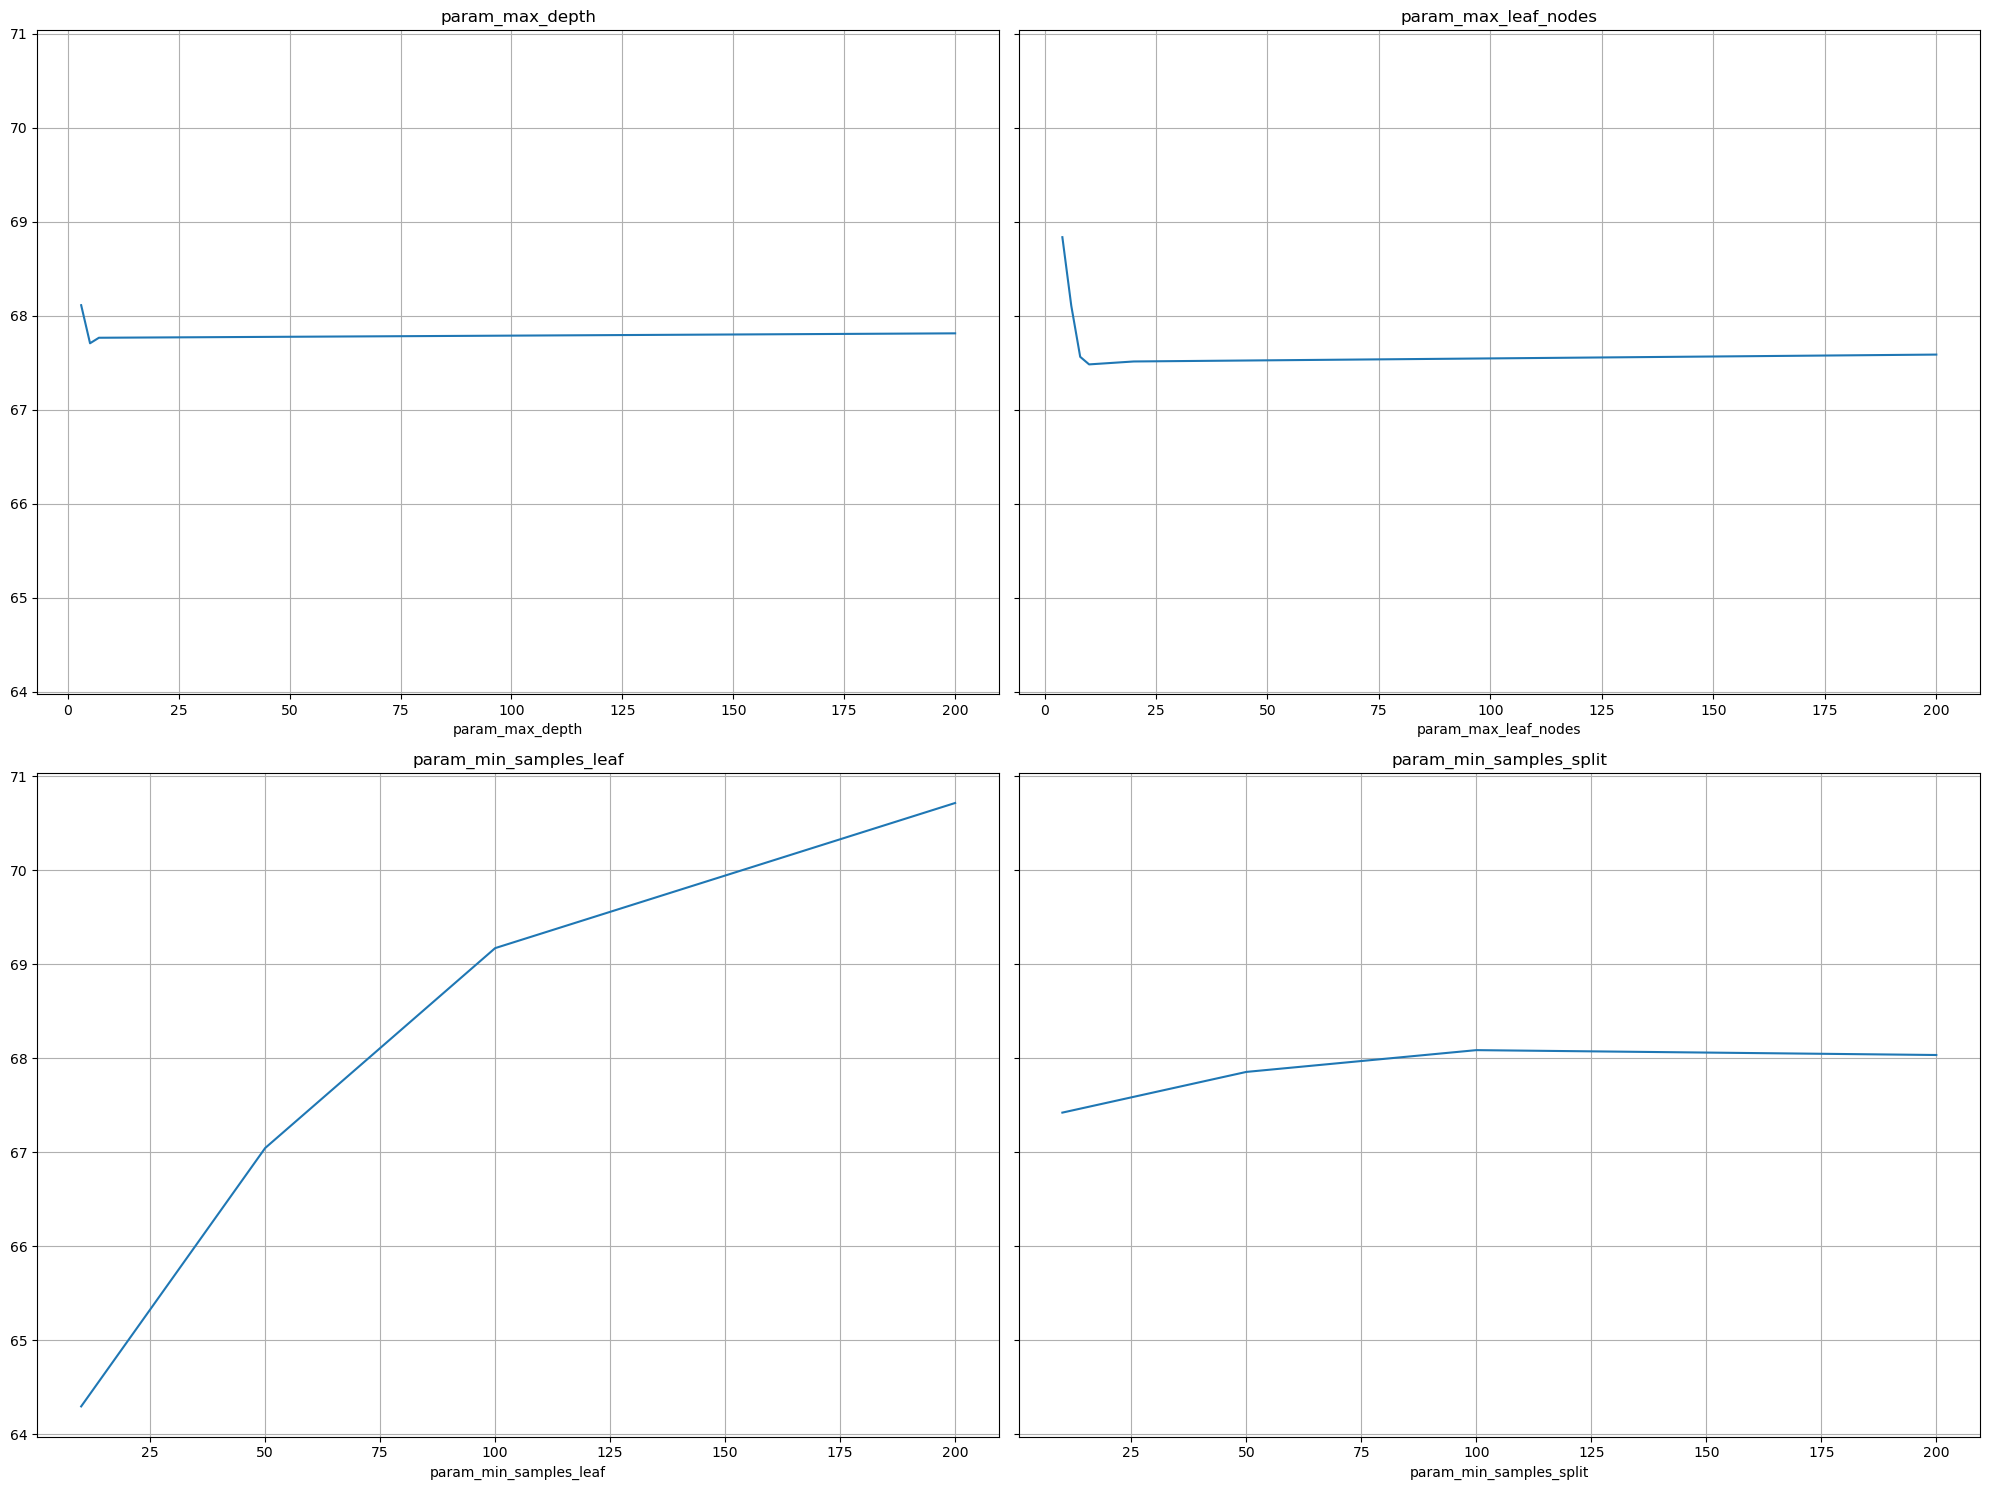

In [26]:

df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [27]:
pd.DataFrame(modelo_final_arbol.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False)

,Importancia
Sub-Category_standard,0.57
Discount_standard,0.22
City_standard,0.17
Category_standard,0.02
Segment_Home Office,0.00
month_September,0.00
Quantity_entre 3 y 4,0.00
month_July,0.00
Order Priority_Medium,0.00
Quantity_entre 1 y 2,0.00


## Lo pruebo cambiando parametros

In [28]:
# Parámetros a evaluar
params_arbol_prueba = {
    'max_depth': [4,5,6,],
    'min_samples_split': [8,9,10,12,15],
    'min_samples_leaf': [7,8,10,15,20],
    'max_leaf_nodes': [190,200,220]
}

grid_search_arbol_prueba=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbol_prueba , cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbol_prueba.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6],
                         'max_leaf_nodes': [190, 200, 220],
                         'min_samples_leaf': [7, 8, 10, 15, 20],
                         'min_samples_split': [8, 9, 10, 12, 15]},
             scoring='neg_mean_squared_error')

In [29]:
modelo_final_arbol_prueba=grid_search_arbol_prueba.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbol_prueba

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=220, min_samples_leaf=7,
                      min_samples_split=10)

In [30]:
y_pred_test_arb_prueba= modelo_final_arbol_prueba.predict(x_test)
y_pred_train_arb_prueba= modelo_final_arbol_prueba.predict(x_train)
df_metricas_arbol_prueba= f.metricas(y_train, y_pred_train_arb_prueba, y_test, y_pred_test_arb_prueba)

df_metricas_arbol_prueba=df_metricas_arbol_prueba.T
df_metricas_arbol_prueba.reset_index(inplace=True)
df_metricas_arbol_prueba

,index,r2_score,MAE,MSE,RMSE
0,train,0.60,32.03,"2,919.83",54.04
1,test,0.57,33.36,"3,447.75",58.72


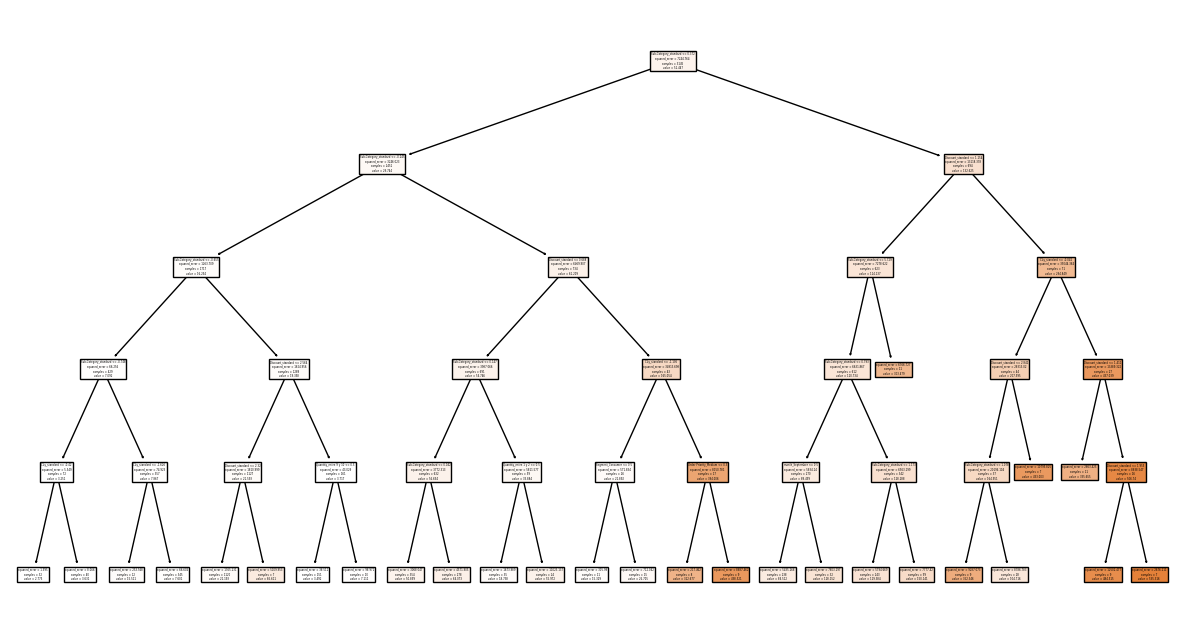

In [31]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=modelo_final_arbol_prueba, feature_names=x.columns, filled=True);

### Vamos a graficarlo porque así se entienden mejor

In [32]:
df_resultados_arbol_prueba=pd.DataFrame(grid_search_arbol_prueba.cv_results_)

In [33]:
df_resultados_arbol_prueba.sort_values(by= "rank_test_score", ascending=True).head(2)    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
127,0.02,0.00,0.01,0.00,5,220,7,10,"{'max_depth': 5, 'max_leaf_nodes': 220, 'min_s...","-2,798.52","-3,195.86","-4,351.93","-2,908.40","-3,265.89","-3,304.12",551.96,1
62,0.02,0.00,0.01,0.01,4,220,10,10,"{'max_depth': 4, 'max_leaf_nodes': 220, 'min_s...","-2,711.63","-3,258.19","-4,293.83","-2,996.12","-3,343.08","-3,320.57",534.36,2


In [34]:
df_resultados_arbol_prueba.shape   #no da el número de modelos que ha generado el árbol 

(225, 17)

In [35]:
df_resultados_arbol_filtrado_prueba=df_resultados_arbol_prueba.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado_prueba["MSE"]= df_resultados_arbol_prueba["mean_test_score"]
df_resultados_arbol_filtrado_prueba.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,4,190,7,8,"-3,394.73"
1,4,190,7,9,"-3,518.55"
2,4,190,7,10,"-3,518.55"
3,4,190,7,12,"-3,394.73"
4,4,190,7,15,"-3,518.55"


In [36]:
df_rmse_profun_prueba= np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun_prueba.head()

,param_max_depth,MSE
0,4,60.08
1,5,60.01
2,6,60.57


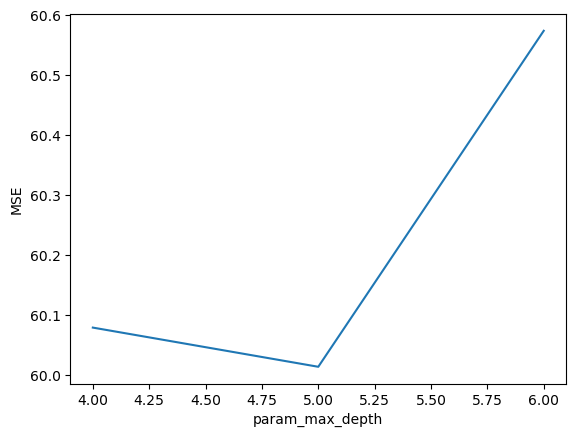

In [37]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun_prueba);

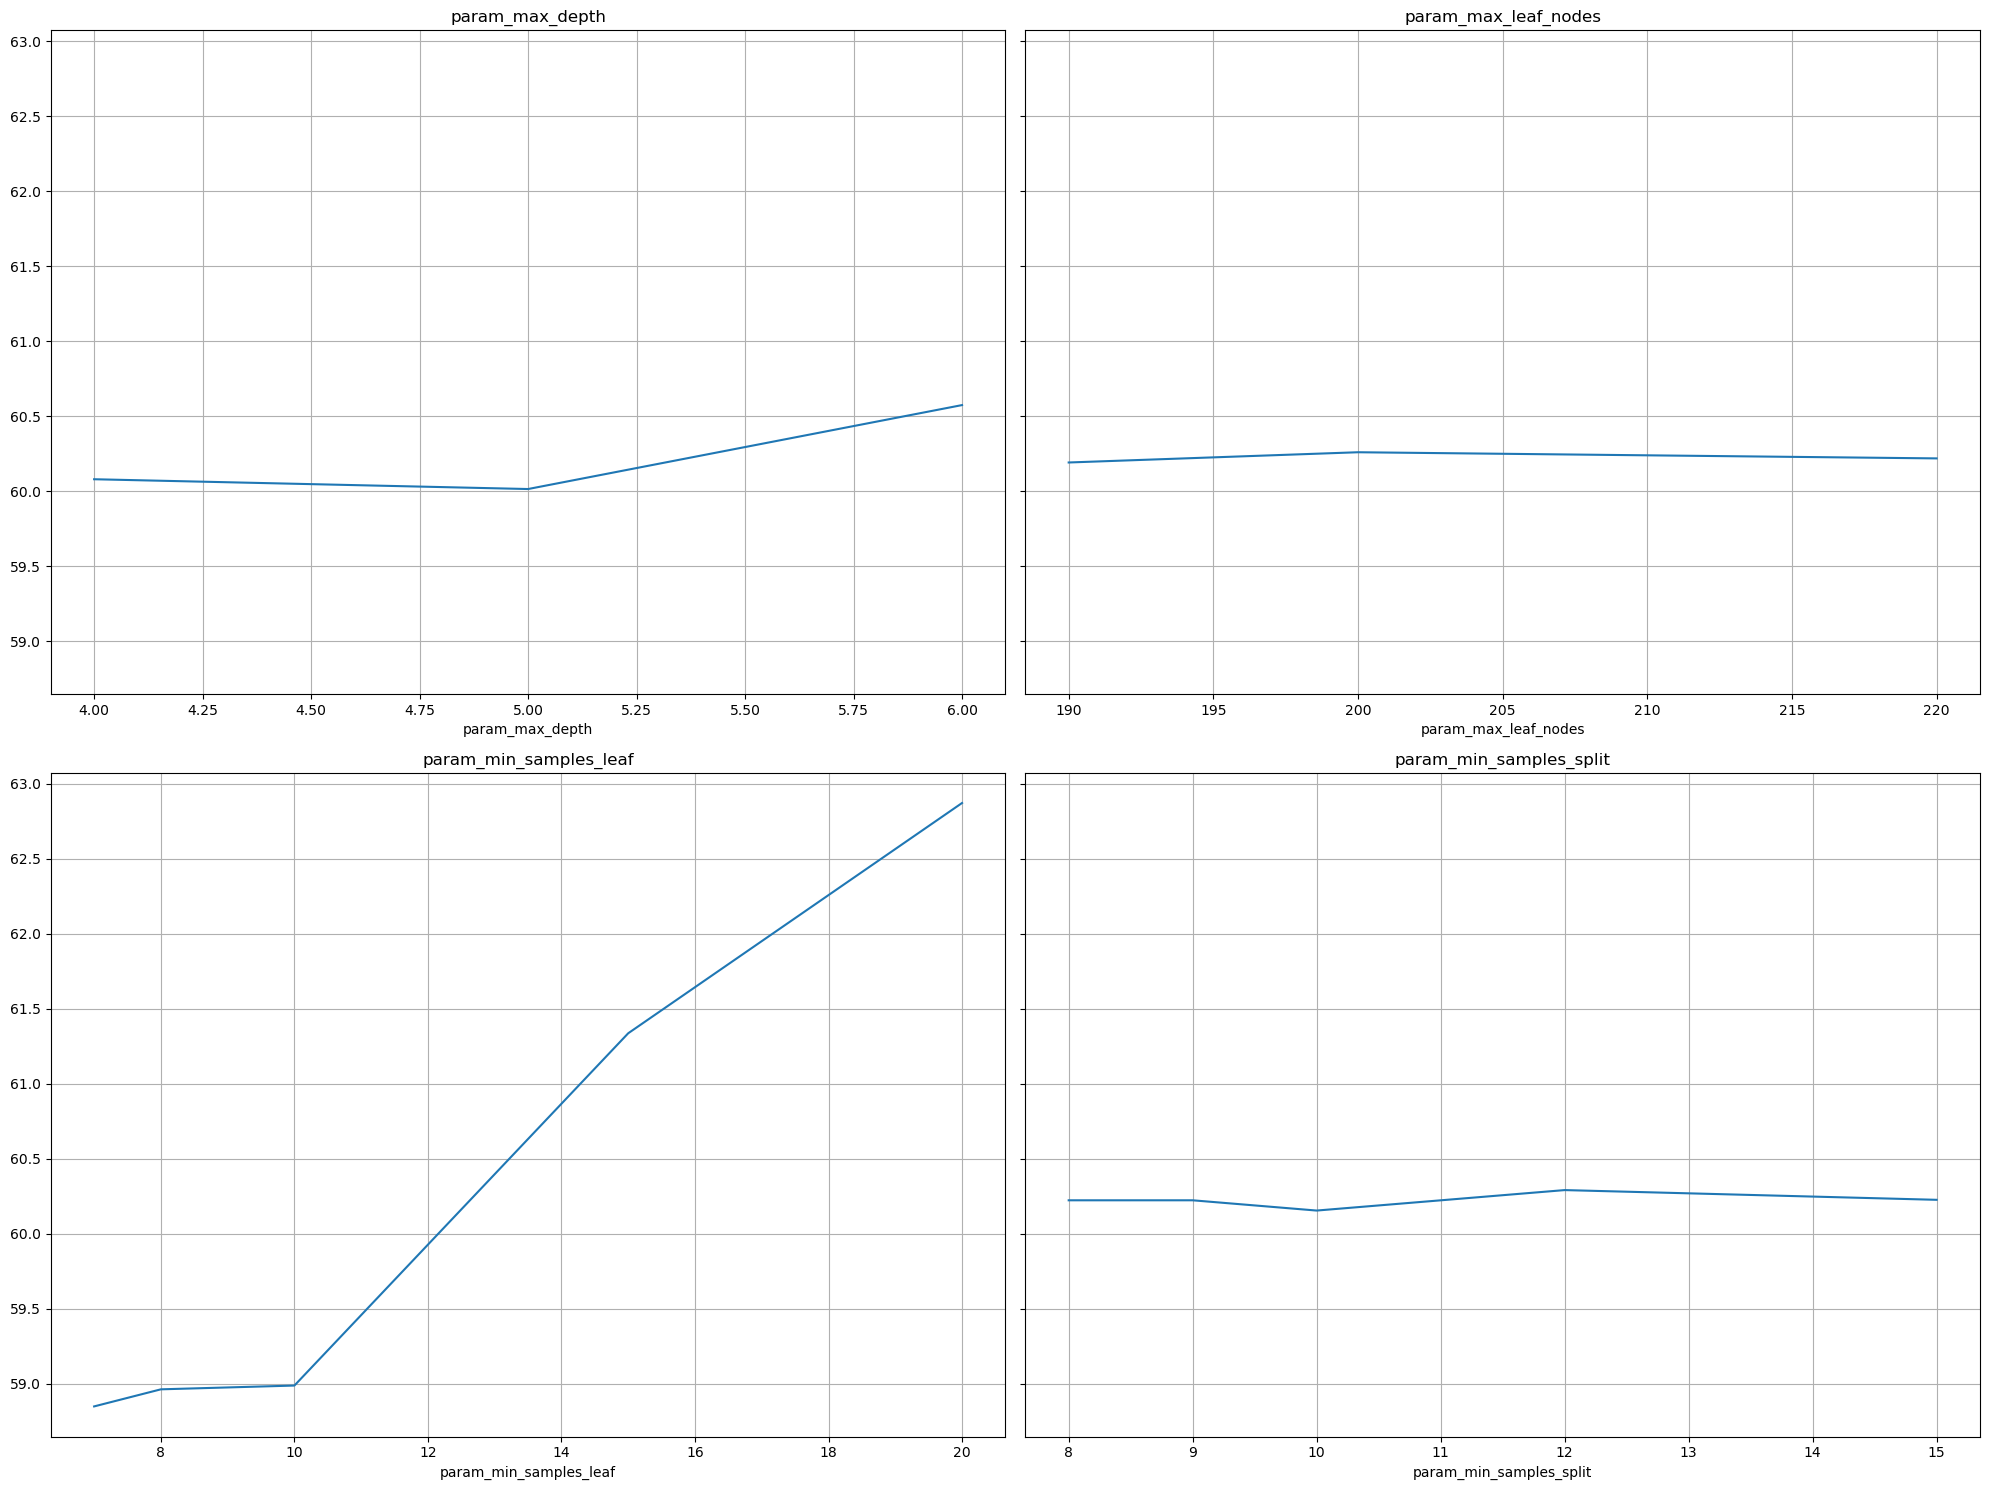

In [38]:

df_rmse_profun_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_profun_prueba = pd.DataFrame(df_rmse_profun_prueba).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado_prueba.columns[:-1]):
    df_rmse_col_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col_prueba.index, y=df_rmse_col_prueba.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [39]:
pd.DataFrame(modelo_final_arbol_prueba.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False).head()

,Importancia
Sub-Category_standard,0.59
Discount_standard,0.24
City_standard,0.16
Order Priority_Medium,0.00
month_September,0.00


**probamos una última combinación de parametros para el modelo**

In [40]:
# Parámetros a evaluar
params_arbol_ult = {
    'max_depth': [4,5,6],
    'min_samples_split': [8,9,10],
    'min_samples_leaf': [10,20,30,100],
    'max_leaf_nodes': [10,70,180,190,200,250]
}

grid_search_arbol_ult=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbol_ult , cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbol_ult.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6],
                         'max_leaf_nodes': [10, 70, 180, 190, 200, 250],
                         'min_samples_leaf': [10, 20, 30, 100],
                         'min_samples_split': [8, 9, 10]},
             scoring='neg_mean_squared_error')

In [41]:
modelo_final_arbol_ult=grid_search_arbol_ult.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbol_ult

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=190, min_samples_leaf=10,
                      min_samples_split=8)

In [42]:
y_pred_test_arb_ult= modelo_final_arbol_ult.predict(x_test)
y_pred_train_arb_ult= modelo_final_arbol_ult.predict(x_train)
df_metricas_arbol_ult= f.metricas(y_train, y_pred_train_arb_ult, y_test, y_pred_test_arb_ult)

df_metricas_arbol_ult=df_metricas_arbol_ult.T
df_metricas_arbol_ult.reset_index(inplace=True)
df_metricas_arbol_ult

,index,r2_score,MAE,MSE,RMSE
0,train,0.56,33.25,"3,177.53",56.37
1,test,0.56,33.52,"3,498.66",59.15


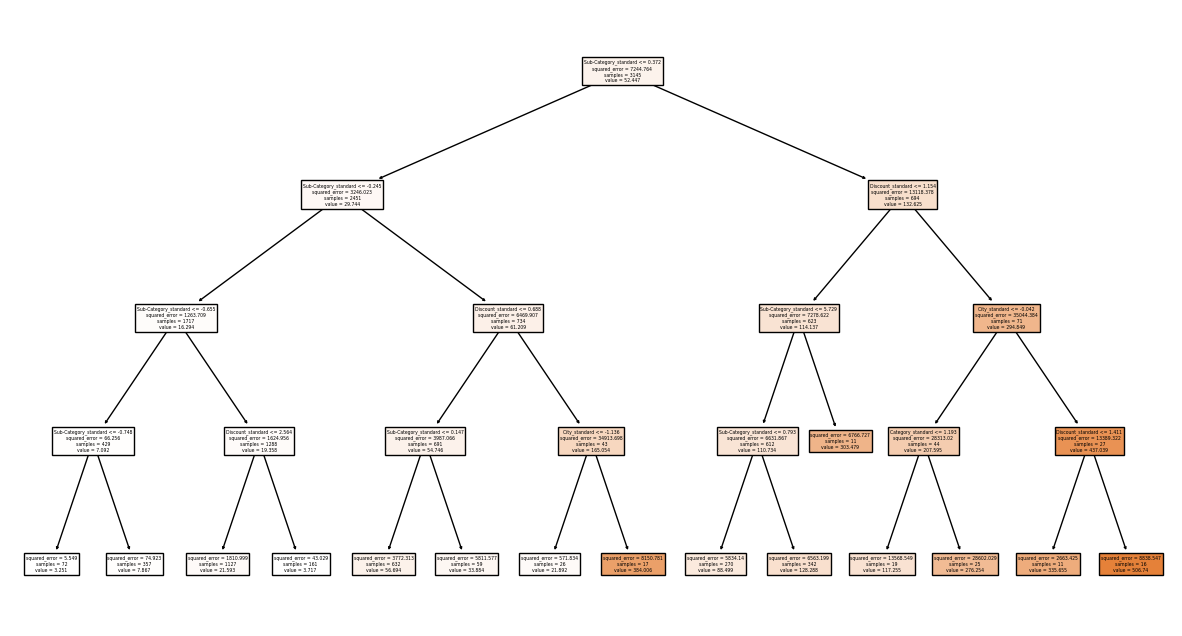

In [43]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=modelo_final_arbol_ult, feature_names=x.columns, filled=True);

### Vamos a graficarlo porque así se entienden mejor

In [44]:
df_resultados_arbol_ult=pd.DataFrame(grid_search_arbol_ult.cv_results_)

In [45]:
df_resultados_arbol_ult.sort_values(by= "rank_test_score", ascending=True).head(2)    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,0.02,0.01,0.01,0.01,4,190,10,8,"{'max_depth': 4, 'max_leaf_nodes': 190, 'min_s...","-2,711.63","-3,258.19","-4,293.83","-2,996.12","-3,343.08","-3,320.57",534.36,1
98,0.02,0.00,0.01,0.00,5,180,10,10,"{'max_depth': 5, 'max_leaf_nodes': 180, 'min_s...","-2,788.01","-3,280.67","-4,320.82","-3,056.37","-3,364.47","-3,362.07",519.39,2


In [46]:
df_resultados_arbol_ult.shape   #no da el número de modelos que ha generado el árbol 

(216, 17)

In [47]:
df_resultados_arbol_filtrado_ult=df_resultados_arbol_ult.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado_ult["MSE"]= df_resultados_arbol_ult["mean_test_score"]
df_resultados_arbol_filtrado_ult.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,4,10,10,8,"-3,557.54"
1,4,10,10,9,"-3,557.54"
2,4,10,10,10,"-3,557.54"
3,4,10,20,8,"-3,935.51"
4,4,10,20,9,"-3,935.51"


In [48]:
df_rmse_profun_ult= np.sqrt(df_resultados_arbol_filtrado_ult.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun_ult.head()

,param_max_depth,MSE
0,4,63.81
1,5,63.90
2,6,64.20


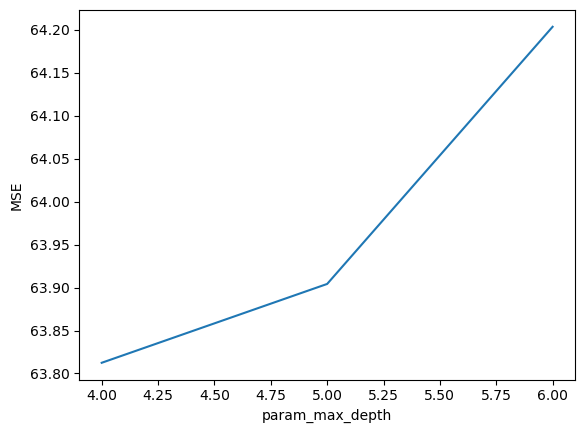

In [49]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun_ult);

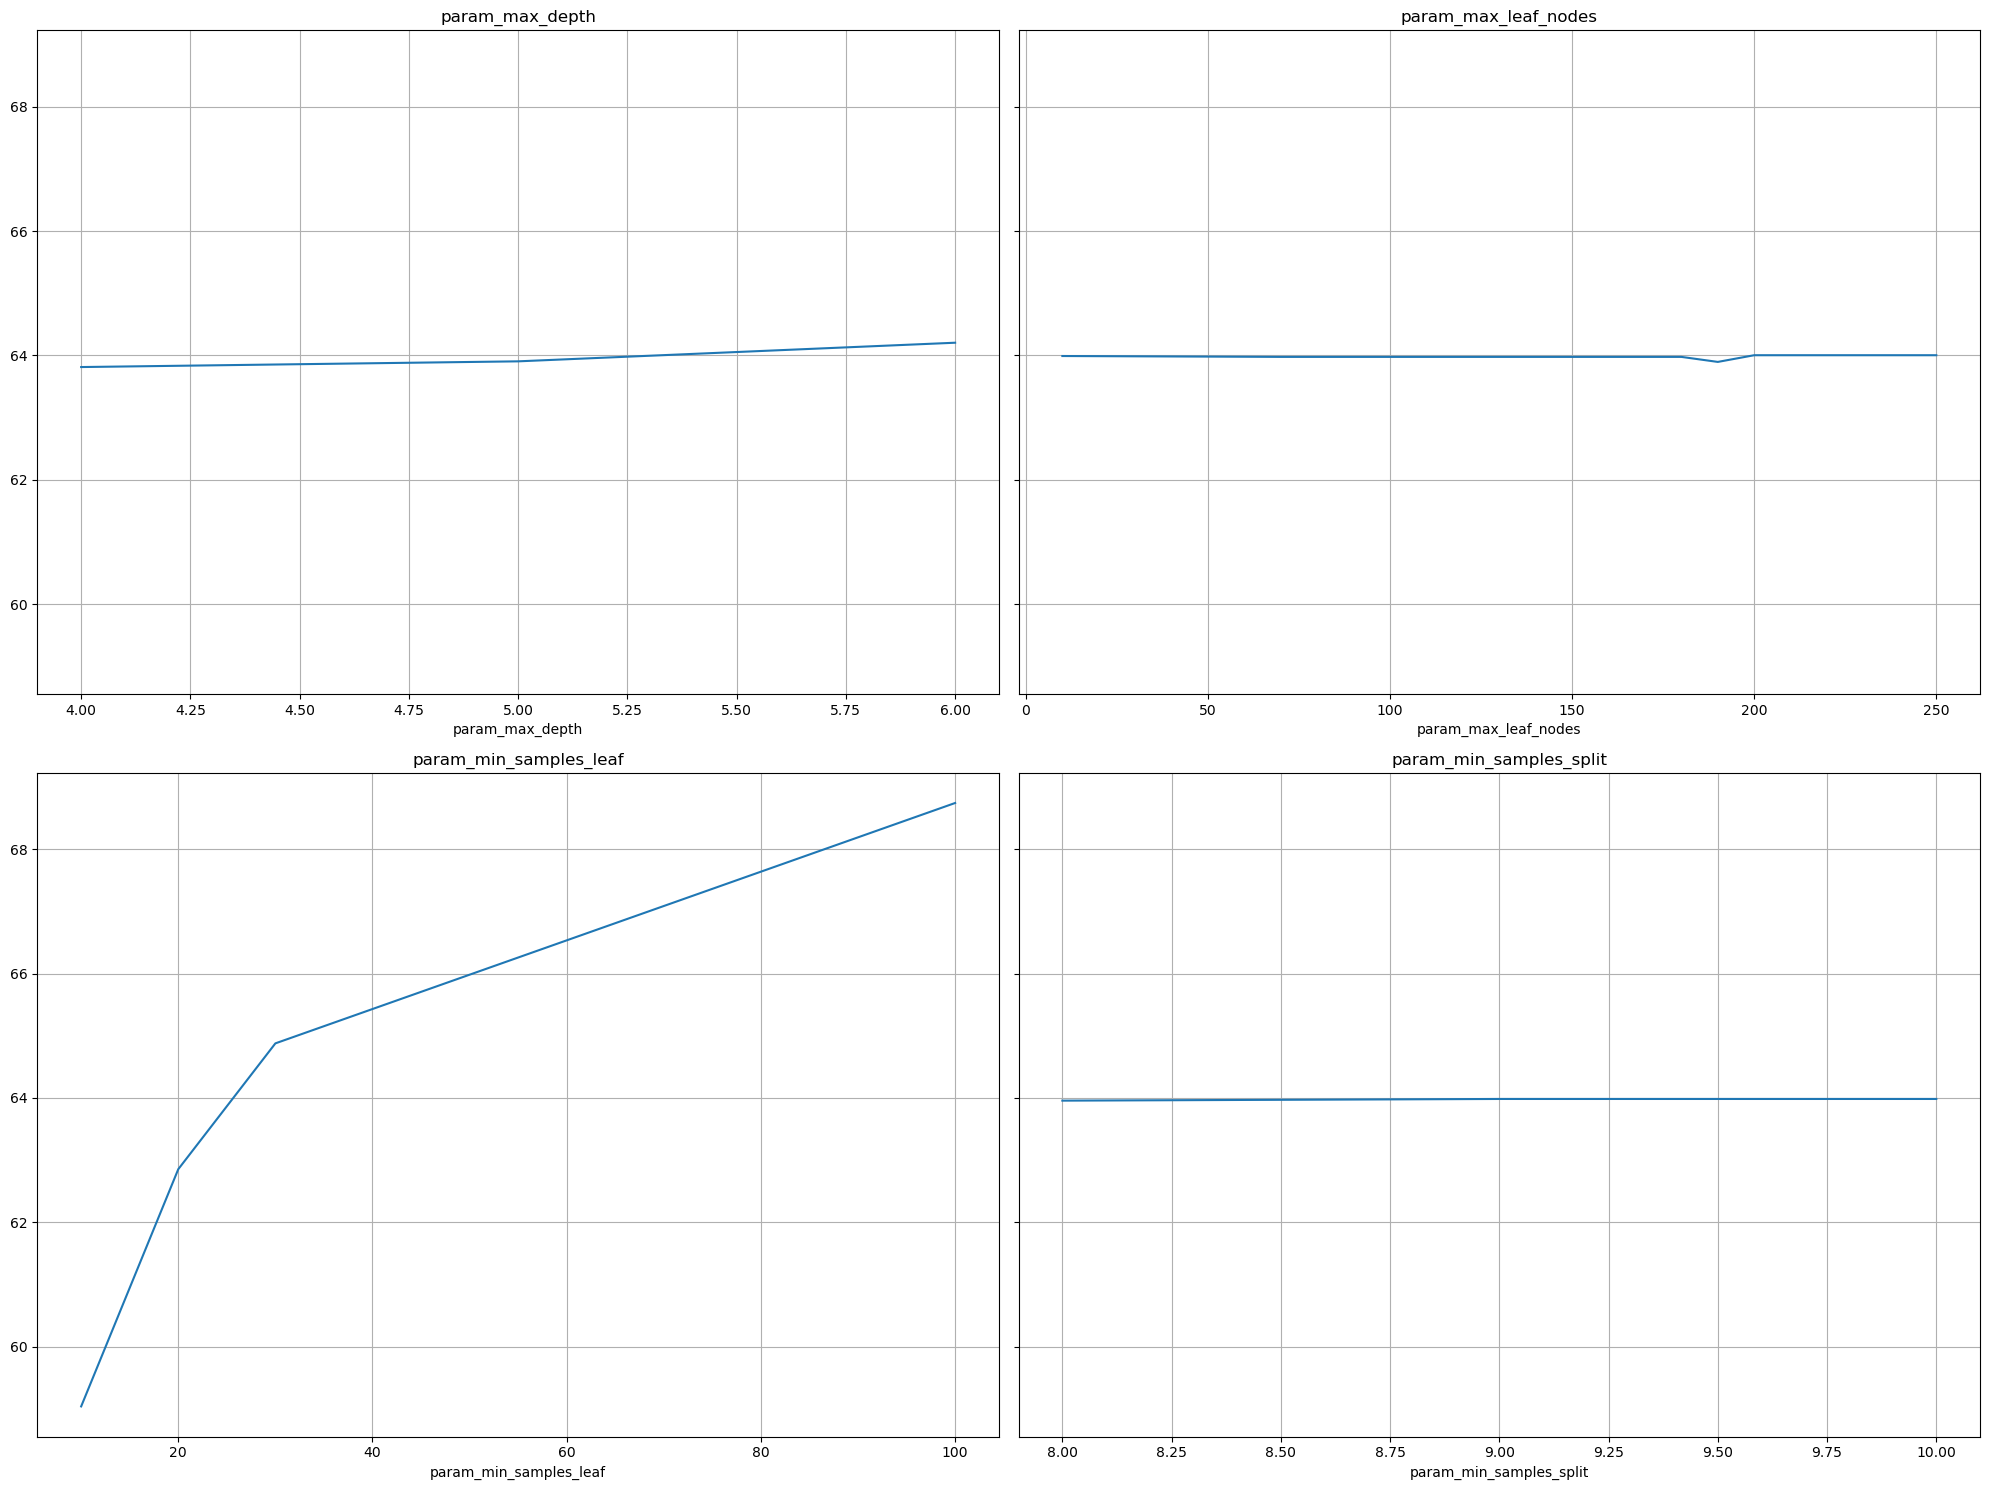

In [50]:

df_rmse_profun_ult = np.sqrt(df_resultados_arbol_filtrado_ult.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_profun_ult = pd.DataFrame(df_rmse_profun_ult).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado_ult.columns[:-1]):
    df_rmse_col_ult = np.sqrt(df_resultados_arbol_filtrado_ult.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col_ult.index, y=df_rmse_col_ult.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [51]:
pd.DataFrame(modelo_final_arbol_ult.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False).head()

,Importancia
Sub-Category_standard,0.58
Discount_standard,0.22
City_standard,0.17
Category_standard,0.02
month_June,0.00


PARA PODER COMPARAR MEJOR LOS MODELOS

In [52]:
dicc={0: "modelo1",
      1: "modelo1",
      2: "modelo2",
      3: "modelo2",
      4: "modelo3",
      5: "modelo3"}

In [53]:
df_final=pd.DataFrame()
df_final=pd.concat([df_final,df_metricas_arbol,df_metricas_arbol_prueba,df_metricas_arbol_ult], axis=0, ignore_index=True)
df_final.reset_index(inplace=True)
df_final["level_0"]=df_final["level_0"].map(dicc)
df_final['diff_r2_score'] = df_final.groupby('level_0')['r2_score'].transform(lambda x: x.iloc[0] - x.iloc[1])
df_final['diff_RMSE'] = df_final.groupby('level_0')['RMSE'].transform(lambda x: x.iloc[0] - x.iloc[1])

df_final

,level_0,index,r2_score,MAE,MSE,RMSE,diff_r2_score,diff_RMSE
0,modelo1,train,0.59,32.02,"2,998.29",54.76,0.04,-5.45
1,modelo1,test,0.55,33.58,"3,625.34",60.21,0.04,-5.45
2,modelo2,train,0.60,32.03,"2,919.83",54.04,0.03,-4.68
3,modelo2,test,0.57,33.36,"3,447.75",58.72,0.03,-4.68
4,modelo3,train,0.56,33.25,"3,177.53",56.37,-0.00,-2.78
5,modelo3,test,0.56,33.52,"3,498.66",59.15,-0.00,-2.78


## Elección de mejor modelo:  
Comparando los modelos nos damos cuenta que el modelo mejor es el modelo 2 (tiene las mejores metricas en comparación).  Sin embargo en mi opinión el modleo más equilibrado es el modleo 3 que aunque sacrifique un poco de r2 y de errores, tiene el menor over fitting
  
**Finalmente me quedo con el modelo 3 correspondiente al último modelo**

In [54]:
df_metricas_arbol_ult.drop(columns= "index", inplace=True)

In [55]:
df_metricas_ulti=df_metricas_arbol_ult.T
df_metricas_ulti.columns= ["train", "test"]
df_metricas_ulti.reset_index(inplace=True)
df_metricas_ulti

,index,train,test
0,r2_score,0.56,0.56
1,MAE,33.25,33.52
2,MSE,"3,177.53","3,498.66"
3,RMSE,56.37,59.15


In [56]:
df_metricas_ulti

,index,train,test
0,r2_score,0.56,0.56
1,MAE,33.25,33.52
2,MSE,"3,177.53","3,498.66"
3,RMSE,56.37,59.15


Vamos a intentar visualizar las cositas

In [57]:
predytest=pd.DataFrame(y_pred_test_arb_ult, columns=["y_pred_test_arb_ult"])

In [58]:
predytrain=pd.DataFrame(y_pred_train_arb_ult, columns=["y_pred_train_arb_ult"])

In [59]:
df_fin=pd.DataFrame()
df_fin=pd.concat([df_fin, predytest, predytrain, y], ignore_index=True, axis=1)

In [60]:
df_fin.columns= ["test_prediccion", "train_prediccion", "Sales_unitario_original"]

In [61]:
df_fin.reset_index(inplace=True)

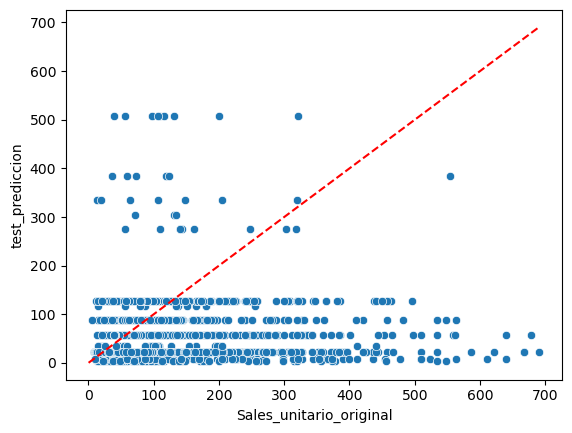

In [62]:
sns.scatterplot(x="Sales_unitario_original", y="test_prediccion", data= df_fin)
plt.plot([df_fin["Sales_unitario_original"].min(), df_fin["Sales_unitario_original"].max()],
         [df_fin["Sales_unitario_original"].min(), df_fin["Sales_unitario_original"].max()],
         color='red', linestyle='--', label='x = y')

***CONCLUSIONES DE ESTE MODELO 3 PARA INTENTAR MEJORAR***  
  
- Este modelo 3 me predice mal los Sales_unitario mayores a 200 aproximadamente (me predice los precios unitarios caros como baratos)  y un poco los Sales_unitario menores a 200 (algunos precios unitarios baratos me los predice como caros)  
